In [1]:
from datetime import datetime
import matplotlib.gridspec as gds
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web

In [2]:
s, e = datetime(2017, 1, 1), datetime(2017, 12, 31)
hk2018 = web.DataReader('2018.HK', 'yahoo', s, e)

In [3]:
# hk2018.plot(y='Adj Close', title='2018.HK Adjusted Close')
# plt.show()

In [4]:
def moving_avg(price, n=20, method='EMA'):
    if method == 'EMA':
        ma = price.ewm(min_periods=0, adjust=True, ignore_na=False, com=n).mean()
        ma = ma.rename('EMA')
    elif method == 'SMA':
        ma = price.rolling(center=False, window=n).mean()
        ma = ma.rename('SMA')
    elif method == 'WMA':
        pass
    return ma

In [5]:
# sma = moving_avg(hk2018['Adj Close'], n=14, method='SMA').dropna()
# ema = moving_avg(hk2018['Adj Close'], n=14, method='EMA').dropna()
# sma.plot(y='SMA', label='SMA')
# ema.plot(y='EMA', label='EMA')
# plt.legend()
# plt.show()

In [6]:
def rsi(price, n=14, method='EMA'):
    delta = price.diff()
    dUp, dDown = delta.copy(), delta.copy()
    dUp[dUp < 0] = 0
    dDown[dDown > 0] = 0
    RolUp = moving_avg(dUp, n, method=method)
    RolDown = moving_avg(dDown.abs(), n, method=method)
    RS = RolUp / RolDown
    RSI = 100.0 - (100.0 / (1 + RS))
    RSI = RSI.rename('RSI({0})'.format(method))
    return RSI

In [7]:
rsi_sma = rsi(hk2018['Adj Close'], n=14, method='SMA').dropna()
rsi_ema = rsi(hk2018['Adj Close'], n=14, method='EMA').dropna()

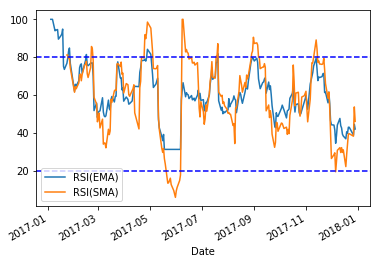

In [8]:
rsi_ema.plot(y='RSI(EMA)', label='RSI(EMA)')
rsi_sma.plot(y='RSI(SMA)', label='RSI(SMA)')
plt.axhline(y=80, color='b', linestyle='--')
plt.axhline(y=20, color='b', linestyle='--')
plt.legend()
plt.show()

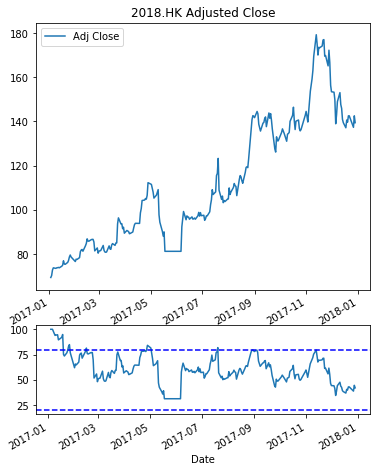

In [9]:
# Set up the figures
fig = plt.figure(figsize=(6,8))
gs = gds.GridSpec(2, 1, height_ratios=[3, 1])
ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])
# Plot the price in above graph 
hk2018.plot(ax=ax1, y='Adj Close', title='2018.HK Adjusted Close')
# Plot the RSI and benchmark in the under graph
rsi_ema.plot(ax=ax2, y='RSI(EMA)', label='RSI(EMA)')
ax2.axhline(y=80, color='b', linestyle='--')
ax2.axhline(y=20, color='b', linestyle='--')
plt.show()